In [1]:
# Personality Get function
def getPersonality(type,index):
    if index == 0:
        if type[index] == 'I':
            return 1
        else:
            return 0
    elif index == 1:
        if type[index] == 'N':
            return 1
        else:
            return 0  
    elif index == 2:
        if type[index] == 'T':
            return 1
        else:
            return 0
    elif index == 3:
        if type[index] == 'J':
            return 1
        else:
            return 0

In [2]:
import pandas as pd
import numpy as np

# read data
mbti = pd.read_csv('mbti.csv',sep = ',')
mbti = mbti[['posts','type']]
df_mbti = mbti.rename(columns={'posts':'utterance'})
df_mbti['cI'] = df_mbti.apply(lambda x:getPersonality(x['type'],0), axis=1)
df_mbti['cN'] = df_mbti.apply(lambda x:getPersonality(x['type'],1), axis=1)
df_mbti['cT'] = df_mbti.apply(lambda x:getPersonality(x['type'],2), axis=1)
df_mbti['cJ'] = df_mbti.apply(lambda x:getPersonality(x['type'],3), axis=1)
df_mbti

,utterance,type,cI,cN,cT,cJ
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,INFJ,1,1,0,1
1,'I'm finding the lack of me in these posts ver...,ENTP,0,1,1,0
2,'Good one _____ https://www.youtube.com/wat...,INTP,1,1,1,0
3,"'Dear INTP, I enjoyed our conversation the o...",INTJ,1,1,1,1
4,'You're fired.|||That's another silly misconce...,ENTJ,0,1,1,1
...,...,...,...,...,...,...
8670,'https://www.youtube.com/watch?v=t8edHB_h908||...,ISFP,1,0,0,0
8671,'So...if this thread already exists someplace ...,ENFP,0,1,0,0
8672,'So many questions when i do these things. I ...,INTP,1,1,1,0
8673,'I am very conflicted right now when it comes ...,INFP,1,1,0,0


In [3]:
# plot personality counts
df_labels = df_mbti[['cI','cN','cT','cJ']]
df_counts = pd.DataFrame([])
df_counts['Introversion'] = df_labels['cI'].value_counts().reset_index()['cI']
df_counts['Intuition'] = df_labels['cN'].value_counts().reset_index()['cN']
df_counts['Thinking'] = df_labels['cT'].value_counts().reset_index()['cT']
df_counts['Judging'] = df_labels['cJ'].value_counts().reset_index()['cJ']
print(df_counts)

   Introversion  Intuition  Thinking  Judging
0          6676       7478      4694     5241
1          1999       1197      3981     3434


In [4]:
print((df_counts[0:1]/df_counts.sum()).round(decimals=3))
print((df_counts[1:2]/df_counts.sum()).round(decimals=3))

   Introversion  Intuition  Thinking  Judging
0          0.77      0.862     0.541    0.604
   Introversion  Intuition  Thinking  Judging
1          0.23      0.138     0.459    0.396


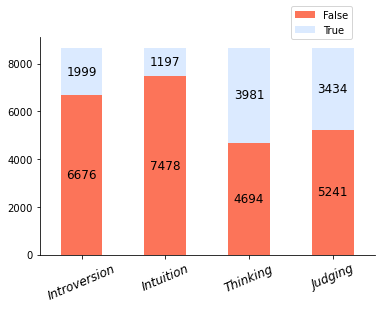

In [5]:
# plot data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize # import figsize

import seaborn as sns

df_counts.index = (['False', 'True'])
ax = df_counts.T.plot.bar(stacked=True, color=['#FC7459', '#DBEAFF'])
# ax.color_palette("pastel")
# annotate the bars
for i, rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the count value and can used as the label
    label_text = f'{height:.0f}'

    label_x = x + width / 2
    label_y = y + height / 2

    # don't include label if it's equivalently 0
    if height > 0.001:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)

ax.set_xticklabels(df_counts.columns, rotation=23, fontsize=12, fontstyle='oblique', fontweight='550')
ax.legend(bbox_to_anchor=(0.75, 0.99), loc=0, borderaxespad=0.0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.savefig('plot/mbti_personality.png', dpi=300)

In [6]:
df_mbti['sample_length'] = df_mbti['utterance'].apply(lambda x: len(x.split(' ')))
df_mbti['sample_length'].describe()

count    8675.000000
mean     1262.678963
std       317.261077
min         4.000000
25%      1081.000000
50%      1314.000000
75%      1497.000000
max      2212.000000
Name: sample_length, dtype: float64

In [7]:
# split data and output tsv
# labels_map = {'n':0,'y':1}
for index, row in df_mbti.iteritems():
    if index == 'cI':
        df_mbti_E = df_mbti[['utterance','cI']]
        df_mbti_E.rename(columns={'cI':'labels'},inplace=True)
        # df_mbti_E['labels'] = df_mbti_E['labels'].map(labels_map)
        df_mbti_E.to_csv('mbti_I_whole.tsv',sep = '\t')
    elif index == 'cN':
        df_mbti_N = df_mbti[['utterance','cN']]
        df_mbti_N.rename(columns={'cN':'labels'},inplace=True)
        # df_mbti_N['labels'] = df_mbti_N['labels'].map(labels_map)
        df_mbti_N.to_csv('mbti_N_whole.tsv',sep = '\t')
    elif index == 'cT':
        df_mbti_A = df_mbti[['utterance','cT']]
        df_mbti_A.rename(columns={'cT':'labels'},inplace=True)
        # df_mbti_A['labels'] = df_mbti_A['labels'].map(labels_map)
        df_mbti_A.to_csv('mbti_T_whole.tsv',sep = '\t')
    elif index == 'cJ':
        df_mbti_C = df_mbti[['utterance','cJ']]
        df_mbti_C.rename(columns={'cJ':'labels'},inplace=True)
        # df_mbti_C['labels'] = df_mbti_C['labels'].map(labels_map)
        df_mbti_C.to_csv('mbti_J_whole.tsv',sep = '\t')

/home/zhiyuan/ENTER/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
